In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('drug.csv')

In [45]:
print(df)

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]


In [47]:
#Display dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [49]:
#List patients older than 50
df[df['Age']>50]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
4,61,F,LOW,HIGH,18.043,drugY
8,60,M,NORMAL,HIGH,15.171,drugY
13,74,F,LOW,HIGH,20.942,drugY
16,69,M,LOW,NORMAL,11.455,drugX
20,57,M,LOW,NORMAL,19.128,drugY
...,...,...,...,...,...,...
190,58,M,HIGH,HIGH,18.991,drugY
192,72,M,LOW,HIGH,16.310,drugY
193,72,M,LOW,HIGH,6.769,drugC
195,56,F,LOW,HIGH,11.567,drugC


In [51]:
#Show top 5 patients with highest Na_to_K value
df.nlargest(5,'Na_to_K')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
96,58,F,LOW,HIGH,38.247,drugY
184,18,F,HIGH,HIGH,37.188,drugY
98,20,M,HIGH,NORMAL,35.639,drugY
188,65,M,HIGH,NORMAL,34.997,drugY
194,46,F,HIGH,HIGH,34.686,drugY


In [53]:
#Count number of each drug prescribed
df['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [55]:
#Maximum and Minimum age in the dataset
x=df['Age'].max()
y=df['Age'].min()

print("Maximum age= ",x)
print("Minimum age= ",y)

Maximum age=  74
Minimum age=  15


In [57]:
#Maximum, Minimum, Average Na_to_K level for patients who received drugX
x=df[df['Drug'] == 'drugX']['Na_to_K'].max()
y=df[df['Drug'] == 'drugX']['Na_to_K'].min()
z=df[df['Drug'] == 'drugX']['Na_to_K'].mean()

print(x)
print(y)
print(z)

14.642
6.683
10.650555555555558


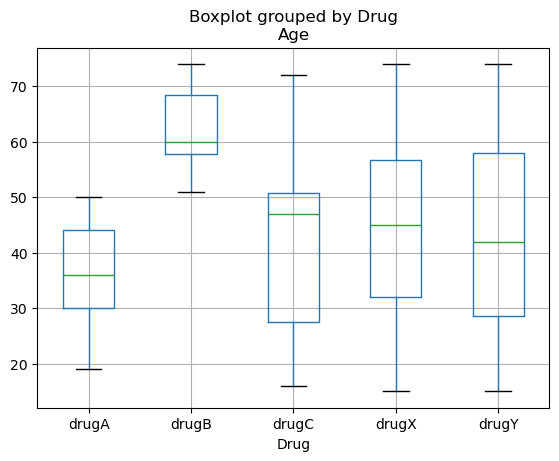

In [59]:
#Compare age distribution for different drugs
df.boxplot(column='Age', by='Drug')
plt.show()

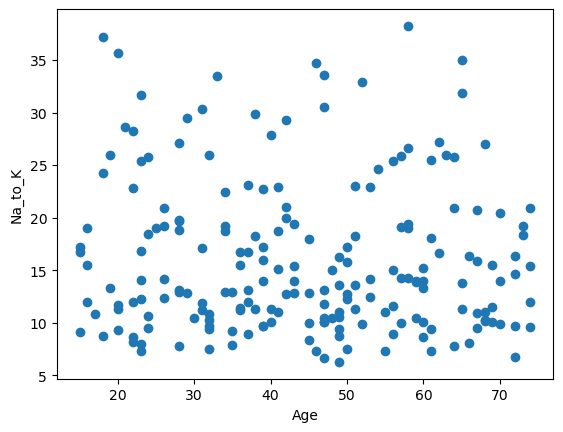

In [61]:
#Plot Sodium-to-Potassium ratio vs age
plt.scatter(df['Age'],df['Na_to_K'])
plt.xlabel('Age')
plt.ylabel('Na_to_K')
plt.show()


In [67]:
#Train a Desicion Tree on only Age + Na_to_K
x=df[['Age','Na_to_K']]
y = df['Drug']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print("Accuracy (Age + Na_to_K only): ", accuracy_score(y_test, model.predict(x_test)))

Accuracy (Age + Na_to_K only):  0.7
